In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

## Uploading the headlines data

In [ ]:
import kagglehub

# Download latest version

path = kagglehub.dataset_download("notlucasp/financial-news-headlines")

guardian = pd.read_csv(os.path.join(path, "guardian_headlines.csv"))
cnbc = pd.read_csv(os.path.join(path, "cnbc_headlines.csv"))
reuters = pd.read_csv(os.path.join(path, "reuters_headlines.csv"))

Using Colab cache for faster access to the 'financial-news-headlines' dataset.


## Feature engineering the Headlines Data

In [ ]:
#Convert dates to match
guardian["date"] = pd.to_datetime(guardian["Time"], format="%d-%b-%y", errors="coerce")
cnbc["Time"] = cnbc["Time"].astype(str).str.replace("ET", "", regex=False).str.strip()
cnbc["date"] = pd.to_datetime(cnbc["Time"], format="%I:%M %p %a, %d %B %Y", errors="coerce")
reuters["date"] = pd.to_datetime(reuters["Time"], format="%b %d %Y", errors="coerce")

# Add source column
guardian["source"] = "Guardian"
cnbc["source"] = "CNBC"
reuters["source"] = "Reuters"

# Make sure headlines match for merging
guardian.rename(columns={"Headlines": "headline"}, inplace=True)
cnbc.rename(columns={"Headlines": "headline"}, inplace=True)
reuters.rename(columns={"Headlines": "headline"}, inplace=True)

# make sure description exists and fill in null values
for df in [guardian, cnbc, reuters]:
    if "Description" not in df.columns:
        df["Description"] = None

# make headline and description all one
for df in [guardian, cnbc, reuters]:
    df["headline_description"] = df["headline"].fillna('') + " " + df["Description"].fillna('')

# --- Keep only the columns we want ---
guardian = guardian[["date", "headline_description", "source"]]
cnbc = cnbc[["date", "headline_description", "source"]]
reuters = reuters[["date", "headline_description", "source"]]

# --- Combine all datasets ---
combined_df = pd.concat([guardian, cnbc, reuters], ignore_index=True)

# --- Drop rows with missing date or text, and sort by date ---
combined_df = combined_df.dropna(subset=["headline_description", "date"])
combined_df = combined_df.sort_values("date").reset_index(drop=True)

# --- Preview ---
print("✅ Combined dataset shape:", combined_df.shape)
print(combined_df.head())


✅ Combined dataset shape: (51806, 3)
        date                               headline_description    source
0 2017-12-17  The Guardian view on Ryanair’s model: a union-...  Guardian
1 2017-12-17  Peter Preston on press and broadcasting  \n\n\...  Guardian
2 2017-12-17  Why business could prosper under a Corbyn gove...  Guardian
3 2017-12-17  Youngest staff to be given UK workplace pensio...  Guardian
4 2017-12-17  Grogonomics  \n\n\n  This year has been about ...  Guardian


In [ ]:
print("Earliest date:", combined_df["date"].min())
print("Latest date:", combined_df["date"].max())

Earliest date: 2017-12-17 00:00:00
Latest date: 2020-07-18 00:00:00


In [ ]:
# SEPERATING OUT BY SPECIFIC TIME PERIODS, using from late 2017 to late 2019 as to not include data about covid

# Define start and end of the period
start_date = pd.to_datetime("2017-12-18")
end_date = pd.to_datetime("2019-12-17")

# Filter by date range
filtered_df = combined_df[
    (combined_df["date"] >= start_date) &
    (combined_df["date"] <= end_date)
]

# Clean the headline text
filtered_df["headline_description"] = filtered_df["headline_description"].str.replace(r'\s+', ' ', regex=True).str.strip()


# making sure headline does not have any extra info

filtered_df["headline_description"] = filtered_df["headline_description"].str.replace(r'\s+', ' ', regex=True).str.strip()

print(filtered_df.head())
print(filtered_df.shape)
print(combined_df.shape)

/tmp/ipython-input-2048441940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["headline_description"] = filtered_df["headline_description"].str.replace(r'\s+', ' ', regex=True).str.strip()


         date                               headline_description    source
20 2017-12-18  Business live Bitcoin bubble warnings grow lou...  Guardian
21 2017-12-18  Christmas tree cutters' labor fight shines lig...  Guardian
22 2017-12-18  How the American government slowly became a bu...  Guardian
23 2017-12-18  ‘They stole the soul of the city’: how Warsaw'...  Guardian
24 2017-12-18  Desperate UK homeowners are cutting prices, sa...  Guardian
(37620, 3)
(51806, 3)


/tmp/ipython-input-2048441940.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["headline_description"] = filtered_df["headline_description"].str.replace(r'\s+', ' ', regex=True).str.strip()


In [ ]:
# seeing how many values there are
print(len(filtered_df))

37620


## Uploading markets index data

In [ ]:
from google.colab import files
xl_market = files.upload()

Saving new_combined_df.csv to new_combined_df (2).csv


In [ ]:
df = pd.read_csv("new_combined_df.csv")

## Feature engineering the markets data

In [ ]:
print(df.head())

         date    Value                               headline_description  \
0  2017-12-18  2690.16  Business live Bitcoin bubble warnings grow lou...   
1  2017-12-18  2690.16  Christmas tree cutters' labor fight shines lig...   
2  2017-12-18  2690.16  How the American government slowly became a bu...   
3  2017-12-18  2690.16  ‘They stole the soul of the city’: how Warsaw'...   
4  2017-12-18  2690.16  Desperate UK homeowners are cutting prices, sa...   

     source  future_value  
0  Guardian       2687.54  
1  Guardian       2687.54  
2  Guardian       2687.54  
3  Guardian       2687.54  
4  Guardian       2687.54  


## Visualizing the data

In [ ]:
#Checking how many headlines per day that we have
headlines_per_day = df.groupby("date").size().reset_index(name="num_headlines")

print(headlines_per_day.head())

         date  num_headlines
0  2017-12-18             40
1  2017-12-19             20
2  2017-12-20             20
3  2017-12-21             20
4  2017-12-22             20


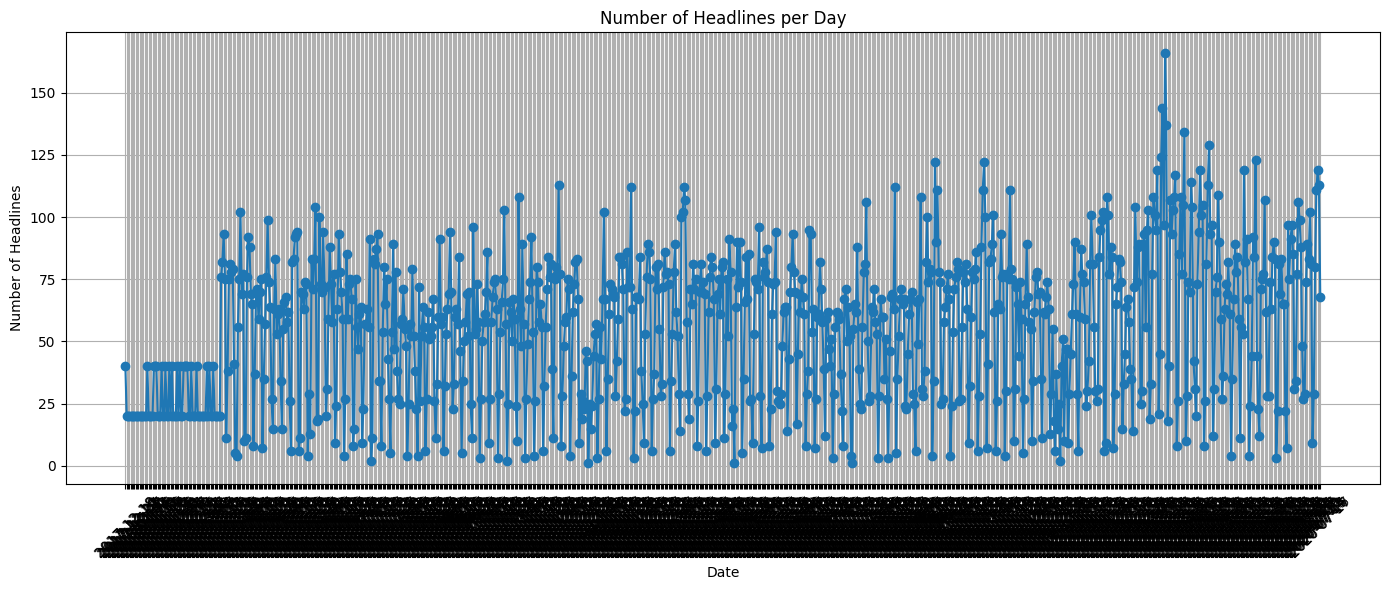

In [ ]:
# LOOKING AT HEADLINES PER DAY
plt.figure(figsize=(14,6))
plt.plot(headlines_per_day["date"], headlines_per_day["num_headlines"], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Number of Headlines")
plt.title("Number of Headlines per Day")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # prevent label cutoff
plt.show()


There's at the very least 15+ headlines per day, sometimes as much as 120, this should make it easy to train our model.

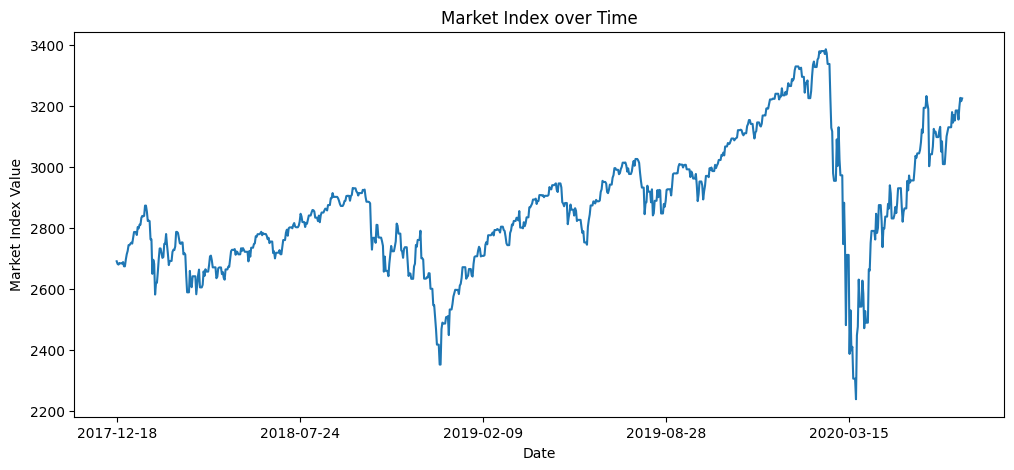

In [ ]:
# Visualizing the market index over time

df.groupby("date")["Value"].mean().plot(figsize=(12,5))
plt.xlabel("Date")
plt.ylabel("Market Index Value")
plt.title("Market Index over Time")
plt.show()


In [ ]:
df.head(200)

,date,Value,headline_description,source,future_value
0,2017-12-18,2690.16,Business live Bitcoin bubble warnings grow lou...,Guardian,2687.54
1,2017-12-18,2690.16,Christmas tree cutters' labor fight shines lig...,Guardian,2687.54
2,2017-12-18,2690.16,How the American government slowly became a bu...,Guardian,2687.54
3,2017-12-18,2690.16,‘They stole the soul of the city’: how Warsaw'...,Guardian,2687.54
4,2017-12-18,2690.16,"Desperate UK homeowners are cutting prices, sa...",Guardian,2687.54
...,...,...,...,...,...
195,2017-12-30,2673.61,Crown Resorts agrees to $150m sale of CrownBet,Guardian,2751.29
196,2017-12-30,2673.61,The long read American reams: why a ‘paperless...,Guardian,2751.29
197,2017-12-30,2673.61,First-ever shipment of Russian gas unlikely to...,Guardian,2751.29
198,2017-12-30,2673.61,Rail passengers lost 3.6m hours in delays in 2...,Guardian,2751.29


In [ ]:
df.shape

(50486, 5)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['pct_change'] = (
    (df['future_value'] - df['Value']) / df['Value']
)
df.head()

,date,Value,headline_description,source,future_value,pct_change
0,2017-12-18,2690.16,Business live Bitcoin bubble warnings grow lou...,Guardian,2687.54,-0.000974
1,2017-12-18,2690.16,Christmas tree cutters' labor fight shines lig...,Guardian,2687.54,-0.000974
2,2017-12-18,2690.16,How the American government slowly became a bu...,Guardian,2687.54,-0.000974
3,2017-12-18,2690.16,‘They stole the soul of the city’: how Warsaw'...,Guardian,2687.54,-0.000974
4,2017-12-18,2690.16,"Desperate UK homeowners are cutting prices, sa...",Guardian,2687.54,-0.000974


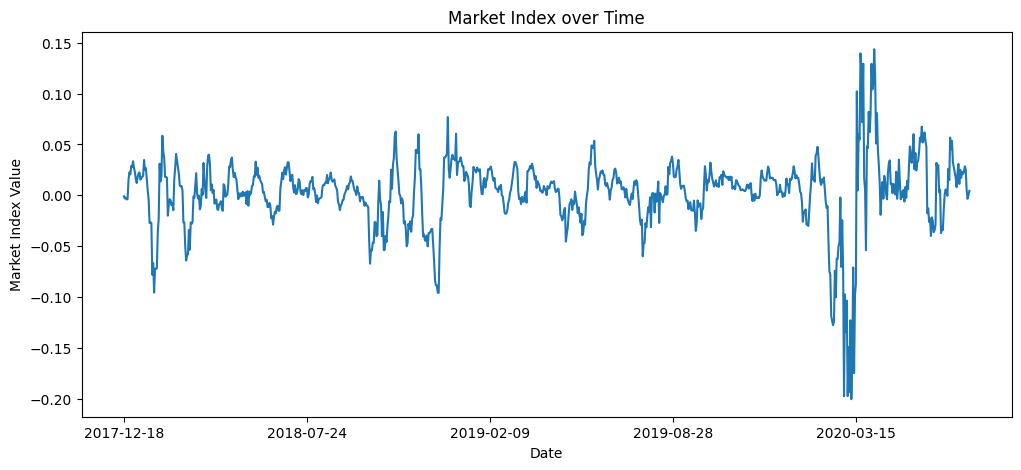

In [ ]:
# Visualizing the market index over time

df.groupby("date")["pct_change"].mean().plot(figsize=(12,5))
plt.xlabel("Date")
plt.ylabel("Market Index Value")
plt.title("Market Index over Time")
plt.show()

In [ ]:
df.shape

(50428, 6)

In [ ]:
df['market_trend'] = (df['pct_change'] > 0).astype(int)
df.head()

,date,Value,headline_description,source,future_value,pct_change,market_trend
0,2017-12-18,2690.16,Business live Bitcoin bubble warnings grow lou...,Guardian,2687.54,-0.000974,0
1,2017-12-18,2690.16,Christmas tree cutters' labor fight shines lig...,Guardian,2687.54,-0.000974,0
2,2017-12-18,2690.16,How the American government slowly became a bu...,Guardian,2687.54,-0.000974,0
3,2017-12-18,2690.16,‘They stole the soul of the city’: how Warsaw'...,Guardian,2687.54,-0.000974,0
4,2017-12-18,2690.16,"Desperate UK homeowners are cutting prices, sa...",Guardian,2687.54,-0.000974,0


In [ ]:
df['headline_description'].iloc[3]

"‘They stole the soul of the city’: how Warsaw's reprivatisation is causing chaos"

# DATA: Non-combined headlines per day

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# --- SORT + DATE-BASED 80/20 SPLIT ---
df = df.sort_values("date")

unique_days = df["date"].unique()
split_idx = int(0.8 * len(unique_days))

train_days = unique_days[:split_idx]
test_days  = unique_days[split_idx:]

train_df = df[df["date"].isin(train_days)]
test_df  = df[df["date"].isin(test_days)]

X_train = train_df["headline_description"].tolist()
X_test  = test_df["headline_description"].tolist()

y_train = train_df["market_trend"].values
y_test  = test_df["market_trend"].values

print("Train headlines:", len(X_train))
print("Test headlines:", len(X_test))

Train headlines: 37828
Test headlines: 12600


# **BASELINES**

# Majority Class Baseline

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Majority class baseline
majority = np.bincount(y_train).argmax()
y_pred_majority = np.full_like(y_test, majority)

print("Majority Accuracy:", accuracy_score(y_test, y_pred_majority))
print(classification_report(y_test, y_pred_majority))

Majority Accuracy: 0.6466666666666666
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4452
           1       0.65      1.00      0.79      8148

    accuracy                           0.65     12600
   macro avg       0.32      0.50      0.39     12600
weighted avg       0.42      0.65      0.51     12600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random Classifier Baseline

In [ ]:
# Random baseline
y_pred_random = np.random.randint(0, 2, len(y_test))

print("Random Accuracy:", accuracy_score(y_test, y_pred_random))
print(classification_report(y_test, y_pred_random))

Random Accuracy: 0.5022222222222222
              precision    recall  f1-score   support

           0       0.36      0.50      0.42      4452
           1       0.65      0.50      0.57      8148

    accuracy                           0.50     12600
   macro avg       0.50      0.50      0.49     12600
weighted avg       0.54      0.50      0.51     12600



# TF-IDF + Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,
    stop_words="english",
    strip_accents="unicode"
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec  = tfidf.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the classifier
clf = LogisticRegression(max_iter=1000)

# Train the classifier on the TF-IDF vectors
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6230952380952381

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.08      0.13      4452
           1       0.65      0.92      0.76      8148

    accuracy                           0.62     12600
   macro avg       0.50      0.50      0.45     12600
weighted avg       0.54      0.62      0.54     12600


Confusion Matrix:
 [[ 370 4082]
 [ 667 7481]]


# TF-IDF + FNN

In [ ]:
X_train_dense = X_train_vec.toarray()
X_test_dense  = X_test_vec.toarray()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(512, input_shape=(X_train_dense.shape[1],), activation='relu'))
model.add(Dropout(0.5))  # prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_dense, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.6013 - loss: 0.6697 - val_accuracy: 0.7806 - val_loss: 0.5869
Epoch 2/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6824 - loss: 0.5835 - val_accuracy: 0.6803 - val_loss: 0.6145
Epoch 3/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8290 - loss: 0.3934 - val_accuracy: 0.6150 - val_loss: 0.7550
Epoch 4/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9402 - loss: 0.1702 - val_accuracy: 0.5930 - val_loss: 0.9968
Epoch 5/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9814 - loss: 0.0625 - val_accuracy: 0.6216 - val_loss: 1.1355


In [ ]:
# Predict probabilities on the test set
y_pred = (model.predict(X_test_dense) > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


394/394 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.36      0.30      0.33      4452
           1       0.65      0.70      0.68      8148

    accuracy                           0.56     12600
   macro avg       0.50      0.50      0.50     12600
weighted avg       0.55      0.56      0.55     12600

Confusion Matrix:

[[1336 3116]
 [2404 5744]]


__________

# Generate BERT Embeddings (Per-Headline, Saved in Dictionary)

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Running on:", device)

# Load BERT-base (uncased)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased").to(device)
bert_model.eval()

# ---- Helper: embed a batch of text ----
def embed_batch(text_batch):
    enc = tokenizer(
        text_batch,
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        output = bert_model(**enc)
        pooled = output.pooler_output

    return pooled.cpu().numpy()  # (batch, 768)

# ---- Build dictionary: {index : embedding_vector} ----
bert_embeddings_dict = {}

texts = df["headline_description"].tolist()
indices = df.index.tolist()

batch_size = 32

for start in range(0, len(texts), batch_size):
    batch_texts = texts[start : start + batch_size]
    batch_indices = indices[start : start + batch_size]

    # Compute embeddings for this batch
    emb = embed_batch(batch_texts)

    # Save each embedding into dictionary
    for idx, vec in zip(batch_indices, emb):
        bert_embeddings_dict[idx] = vec

print("Created embeddings for", len(bert_embeddings_dict), "headlines.")

# ---- Save dictionary (so we never have to rerun this slow step) ----
import pickle
with open("bert_embeddings_dict.pkl", "wb") as f:
    pickle.dump(bert_embeddings_dict, f)

print("Saved: bert_embeddings_dict.pkl")

Running on: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Created embeddings for 50428 headlines.
Saved: bert_embeddings_dict.pkl


In [ ]:
import pickle

with open("bert_embeddings_dict.pkl", "rb") as f:
    bert_embeddings_dict = pickle.load(f)

print("Loaded embeddings for", len(bert_embeddings_dict), "headlines")

Loaded embeddings for 50428 headlines


In [ ]:
X_train = np.array([bert_embeddings_dict[i] for i in train_df.index])
X_test  = np.array([bert_embeddings_dict[i] for i in test_df.index])

# Train Logistic Regression on BERT Embeddings

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

clf_bert = LogisticRegression(max_iter=2000)
clf_bert.fit(X_train, y_train)

y_pred_bert = clf_bert.predict(X_test)

print("\n=== BERT + Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bert))
print(classification_report(y_test, y_pred_bert))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bert))



=== BERT + Logistic Regression ===
Accuracy: 0.6318681318681318
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.63      1.00      0.77       115

    accuracy                           0.63       182
   macro avg       0.32      0.50      0.39       182
weighted avg       0.40      0.63      0.49       182


Confusion Matrix:
 [[  0  67]
 [  0 115]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Train FNN on BERT Embeddings

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model_bert_fnn = Sequential([
    Dense(512, activation="relu", input_shape=(768,)),
    Dropout(0.4),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model_bert_fnn.compile(
    optimizer=Adam(0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model_bert_fnn.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5575 - loss: 0.7955 - val_accuracy: 0.7842 - val_loss: 0.6141
Epoch 2/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5984 - loss: 0.6784 - val_accuracy: 0.7842 - val_loss: 0.5982
Epoch 3/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6085 - loss: 0.6719 - val_accuracy: 0.7842 - val_loss: 0.6204
Epoch 4/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6050 - loss: 0.6716 - val_accuracy: 0.7842 - val_loss: 0.6012
Epoch 5/5
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6084 - loss: 0.6690 - val_accuracy: 0.7842 - val_loss: 0.5890


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred_prob = model_bert_fnn.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.6466666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4452
           1       0.65      1.00      0.79      8148

    accuracy                           0.65     12600
   macro avg       0.32      0.50      0.39     12600
weighted avg       0.42      0.65      0.51     12600


Confusion Matrix:
 [[   0 4452]
 [   0 8148]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# DATA: Build Daily-Level Dataset (Combine All Headlines Per Day)

In [ ]:
# Combine all headlines for each date into one long text string
daily_df = df.groupby("date")["headline_description"].apply(
    lambda x: " ".join(x)
).reset_index()

# Attach the average S&P 500 index value for each date
daily_df = daily_df.merge(
    df.groupby("date")["Value"].mean().reset_index(),
    on="date"
)

# Sort chronologically
daily_df = daily_df.sort_values("date").reset_index(drop=True)

# Create future market value (shift by +15 days)
daily_df["future_value"] = daily_df["Value"].shift(-15)

# Remove rows with unavailable labels at the end
daily_df = daily_df.dropna(subset=["future_value"]).copy()

# Binary target: 1 = market goes up, 0 = market goes down
daily_df["daily_trend"] = (daily_df["future_value"] > daily_df["Value"]).astype(int)

print("Daily_df:", daily_df.shape)
print(daily_df.head())

Daily_df: (910, 5)
         date                               headline_description    Value  \
0  2017-12-18  Business live Bitcoin bubble warnings grow lou...  2690.16   
1  2017-12-19  Nils Pratley on finance Is this the end for bi...  2681.47   
2  2017-12-20  A victory for workers over Uber. But beware th...  2679.25   
3  2017-12-21  The Guardian view on rape and the police: just...  2684.57   
4  2017-12-22  Nuclear and renewables provide record share of...  2683.34   

   future_value  daily_trend  
0       2747.71            1  
1       2751.29            1  
2       2748.23            1  
3       2767.56            1  
4       2786.24            1  


In [ ]:
y = daily_df["daily_trend"].values
texts = daily_df["headline_description"].values

split_idx = int(0.8 * len(y))

X_train_text = texts[:split_idx]
X_test_text  = texts[split_idx:]

y_train = y[:split_idx]
y_test  = y[split_idx:]

print(len(X_train_text), len(X_test_text))

728 182


# **BASELINES**

# Majority Class Baseline

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Majority baseline
majority = np.bincount(y_train).argmax()
y_pred_majority = np.full_like(y_test, majority)

print("Majority:", accuracy_score(y_test, y_pred_majority))
print(classification_report(y_test, y_pred_majority))

Majority: 0.6318681318681318
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.63      1.00      0.77       115

    accuracy                           0.63       182
   macro avg       0.32      0.50      0.39       182
weighted avg       0.40      0.63      0.49       182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random Classifier Baseline

In [ ]:
# Random baseline (uniform random guessing)
y_pred_rand = np.random.randint(0, 2, len(y_test))

print("Random:", accuracy_score(y_test, y_pred_rand))
print(classification_report(y_test, y_pred_rand))

Random: 0.47802197802197804
              precision    recall  f1-score   support

           0       0.33      0.40      0.36        67
           1       0.60      0.52      0.56       115

    accuracy                           0.48       182
   macro avg       0.46      0.46      0.46       182
weighted avg       0.50      0.48      0.49       182



# TF-IDF + Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer with accent stripping and lowercasing
tfidf = TfidfVectorizer(
    max_features=20000,
    stop_words="english",
    strip_accents='unicode',  # or 'ascii'
    lowercase=True            # convert all text to lowercase
)

# Fit on training data and transform
X_train_vec = tfidf.fit_transform(X_train_text)
X_test_vec  = tfidf.transform(X_test_text)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
clf = LogisticRegression(max_iter=2000)

# Train the classifier on the TF-IDF vectors
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6318681318681318

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.63      1.00      0.77       115

    accuracy                           0.63       182
   macro avg       0.32      0.50      0.39       182
weighted avg       0.40      0.63      0.49       182


Confusion Matrix:
 [[  0  67]
 [  0 115]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# TF-IDF + FNN

In [ ]:
X_train_dense = X_train_vec.toarray()
X_test_dense  = X_test_vec.toarray()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(512, activation="relu", input_shape=(X_train_dense.shape[1],)),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train_dense, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=1
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 345ms/step - accuracy: 0.5656 - loss: 0.6806 - val_accuracy: 0.8219 - val_loss: 0.5119
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6374 - loss: 0.6249 - val_accuracy: 0.8219 - val_loss: 0.5197
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6380 - loss: 0.5362 - val_accuracy: 0.8219 - val_loss: 0.4766
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8376 - loss: 0.3777 - val_accuracy: 0.8151 - val_loss: 0.4565
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9957 - loss: 0.1630 - val_accuracy: 0.7260 - val_loss: 0.5104


In [ ]:
y_pred = (model.predict(X_test_dense) > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
Accuracy: 0.6208791208791209
Classification Report:

              precision    recall  f1-score   support

           0       0.46      0.16      0.24        67
           1       0.65      0.89      0.75       115

    accuracy                           0.62       182
   macro avg       0.55      0.53      0.49       182
weighted avg       0.58      0.62      0.56       182

Confusion Matrix:

[[ 11  56]
 [ 13 102]]


# Aggregate Headline Embeddings into Daily Market Embeddings

In [ ]:
import pickle

with open("bert_embeddings_dict.pkl", "rb") as f:
    bert_embeddings_dict = pickle.load(f)

print("Loaded:", len(bert_embeddings_dict))

Loaded: 50428


In [ ]:
import numpy as np

daily_embeddings = {}  # dictionary: {date : 768-dim vector}

# Group all headlines by date
for date, group in df.groupby("date"):

    # Get the indices of all headlines on that date
    idxs = group.index.tolist()

    # Look up each embed vector using our dictionary from Step 4
    vectors = np.array([bert_embeddings_dict[i] for i in idxs])

    # Average embedding for the whole day (shape = 768,)
    avg_vec = vectors.mean(axis=0)

    daily_embeddings[date] = avg_vec

print("Days with embeddings:", len(daily_embeddings))

Days with embeddings: 925


In [ ]:
# Build Train/Test Split Using Dates
import numpy as np

# All dates for which we have an embedding
unique_days = sorted(list(daily_embeddings.keys()))

# Only keep days that exist in daily_df (alignment check)
valid_days = [d for d in unique_days if d in daily_df["date"].values]

# Split 80/20
split_idx = int(0.8 * len(valid_days))
train_days = valid_days[:split_idx]
test_days  = valid_days[split_idx:]

# X = daily embedding vectors
X_train = np.array([daily_embeddings[d] for d in train_days])
X_test  = np.array([daily_embeddings[d] for d in test_days])

# y = next-day market direction labels
daily_idx = daily_df.set_index("date")
y_train = daily_idx.loc[train_days]["daily_trend"].values
y_test  = daily_idx.loc[test_days]["daily_trend"].values

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (728, 768)
X_test: (182, 768)
y_train: (728,)
y_test: (182,)


# Daily BERT Embeddings + Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
clf = LogisticRegression(max_iter=500)

# Fit on training data
clf.fit(X_train, y_train)

# Predict on held-out test set
y_pred = clf.predict(X_test)

# Evaluation
print("\nFINAL RESULTS:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))


FINAL RESULTS:
Accuracy: 0.6318681318681318
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.63      1.00      0.77       115

    accuracy                           0.63       182
   macro avg       0.32      0.50      0.39       182
weighted avg       0.40      0.63      0.49       182

Confusion matrix:
 [[  0  67]
 [  0 115]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# BERT + FNN

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model_bert = Sequential([
    Dense(512, activation="relu", input_shape=(768,)),
    Dropout(0.4),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model_bert.compile(
    optimizer=Adam(0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model_bert.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=1
)

y_pred = (model_bert.predict(X_test_scaled) > 0.5).astype(int)

print("\n=== BERT (Daily Avg) + FNN ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - accuracy: 0.5459 - loss: 0.9243 - val_accuracy: 0.8082 - val_loss: 0.5266
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6155 - loss: 0.8736 - val_accuracy: 0.7260 - val_loss: 0.6463
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5908 - loss: 0.8634 - val_accuracy: 0.4795 - val_loss: 0.9724
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5538 - loss: 0.9304 - val_accuracy: 0.8082 - val_loss: 0.6299
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6304 - loss: 0.8606 - val_accuracy: 0.5000 - val_loss: 0.7989


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

=== BERT (Daily Avg) + FNN ===
Accuracy: 0.38461538461538464
              precision    recall  f1-score   support

           0       0.29      0.48      0.36        67
           1       0.52      0.33      0.40       115

    accuracy                           0.38       182
   macro avg       0.41      0.40      0.38       182
weighted avg       0.44      0.38      0.39       182

Confusion matrix:
 [[32 35]
 [77 38]]


# FinBERT sentiment features

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

tokenizer_f = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model_f = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert").to(device)
model_f.eval()

Using device: cuda


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# --- Build daily dataframe again (fresh) ---
daily_df = df.groupby("date")["headline_description"].apply(
    lambda x: " ".join(x)
).reset_index()

# daily average S&P value
daily_df = daily_df.merge(
    df.groupby("date")["Value"].mean().reset_index(),
    on="date"
)

# Sort
daily_df = daily_df.sort_values("date").reset_index(drop=True)

# ---- 1-day future prediction ----
daily_df["future_value"] = daily_df["Value"].shift(-1)

# Drop the last day (no label)
daily_df = daily_df.dropna(subset=["future_value"]).copy()

# Trend label: 1 = up, 0 = down
daily_df["daily_trend"] = (daily_df["future_value"] > daily_df["Value"]).astype(int)


In [ ]:
print(daily_df["daily_trend"].value_counts(normalize=True))

daily_trend
0    0.588745
1    0.411255
Name: proportion, dtype: float64


In [ ]:
def finbert_predict_batch(text_list, batch_size=32):
    pos_list, neg_list, neu_list = [], [], []

    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i+batch_size]

        encoding = tokenizer_f(
            batch,
            padding=True,
            truncation=True,
            max_length=128,
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            out = model_f(**encoding)
            probs = torch.softmax(out.logits, dim=1).cpu().numpy()

        # FinBERT order: [positive, negative, neutral]
        pos_list.extend(probs[:, 0])
        neg_list.extend(probs[:, 1])
        neu_list.extend(probs[:, 2])

    return np.array(pos_list), np.array(neg_list), np.array(neu_list)


In [ ]:
# --- Apply to all headlines ---
texts = df["headline_description"].tolist()
pos, neg, neu = finbert_predict_batch(texts)

df["sent_pos"] = pos
df["sent_neg"] = neg
df["sent_neu"] = neu

print(df[["sent_pos", "sent_neg", "sent_neu"]].head())

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

    sent_pos  sent_neg  sent_neu
0   0.039327  0.534575  0.426098
22  0.931026  0.018703  0.050271
23  0.027959  0.194428  0.777613
25  0.035331  0.063357  0.901312
26  0.055986  0.017100  0.926913


In [ ]:
# Aggregate FinBERT Scores Daily
daily_sent = df.groupby("date")[["sent_pos", "sent_neg", "sent_neu"]].mean()
daily_sent = daily_sent.sort_index()

print("Daily sentiment shape:", daily_sent.shape)
daily_sent.head()

Daily sentiment shape: (925, 3)


,sent_pos,sent_neg,sent_neu
date,,,
2017-12-18,0.134951,0.427190,0.437860
2017-12-19,0.098566,0.410148,0.491286
2017-12-20,0.153501,0.408590,0.437910
2017-12-21,0.094427,0.396805,0.508767
2017-12-22,0.205508,0.310151,0.484341


# BERT + FinBERT combined model

In [ ]:
# Load BERT Daily Embeddings from Earlier Step
import pickle

with open("daily_embeddings.pkl", "rb") as f:
    daily_embeddings = pickle.load(f)

print("Loaded daily BERT embeddings:", len(daily_embeddings))

FileNotFoundError: [Errno 2] No such file or directory: 'daily_embeddings.pkl'

In [ ]:
# Build Final Combined Daily Feature Matrix
X_daily = []
y_daily = []

# Mapping for daily labels
trend_map = daily_df.set_index("date")["daily_trend"]

for date in daily_sent.index:
    if (date in daily_embeddings) and (date in trend_map.index):

        bert_vec = daily_embeddings[date]          # (768,)
        sent_vec = daily_sent.loc[date].values     # (3,)
        combined = np.concatenate([bert_vec, sent_vec])  # (771,)

        X_daily.append(combined)
        y_daily.append(trend_map.loc[date])

X_daily = np.array(X_daily)
y_daily = np.array(y_daily)

print("X_daily shape:", X_daily.shape)
print("y_daily shape:", y_daily.shape)

In [ ]:
split_idx = int(0.8 * len(X_daily))

X_train = X_daily[:split_idx]
X_test  = X_daily[split_idx:]
y_train = y_daily[:split_idx]
y_test  = y_daily[split_idx:]

print("Train:", X_train.shape, "Test:", X_test.shape)

**Train logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Logistic Regression with regularization + class balancing
clf = LogisticRegression(
    max_iter=3000,
    class_weight="balanced",
    penalty="l2",
    C=0.5
)

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Basic Error Analysis

In [ ]:
import pandas as pd

# Get dates aligned with y_daily
aligned_dates = daily_sent.index[:len(X_daily)]

# Split aligned dates the same way as X_daily
test_dates = aligned_dates[split_idx:]

# Build error dataframe
error_df = pd.DataFrame({
    "date": test_dates,
    "true": y_test,
    "pred": y_pred
})

# Only wrong predictions
errors = error_df[error_df["true"] != error_df["pred"]]

print("\nSample Misclassifications (first 15):")
print(errors.head(15))

In [ ]:
bad_dates = errors["date"].tolist()

misclassified_headlines = df[df["date"].isin(bad_dates)][[
    "date", "headline_description", "sent_pos","sent_neg","sent_neu",
    "pct_change", "market_trend"
]]

misclassified_headlines.head(30)

# Model comparison narrative

In [ ]:
from sklearn.dummy import DummyClassifier

# Majority baseline
dummy_majority = DummyClassifier(strategy="most_frequent")
dummy_majority.fit(X_train_scaled, y_train)
print("Majority baseline:", dummy_majority.score(X_test_scaled, y_test))

# Random baseline
dummy_random = DummyClassifier(strategy="uniform")
dummy_random.fit(X_train_scaled, y_train)
print("Random baseline:", dummy_random.score(X_test_scaled, y_test))